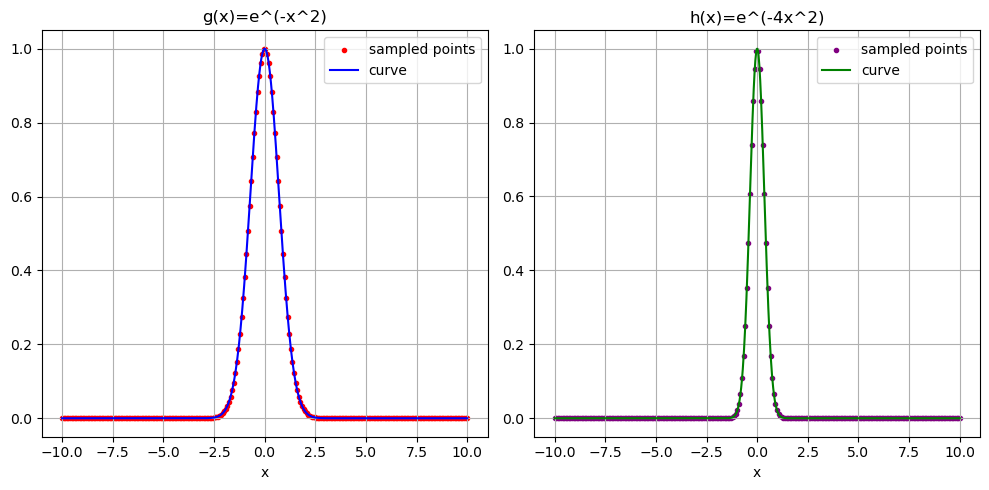

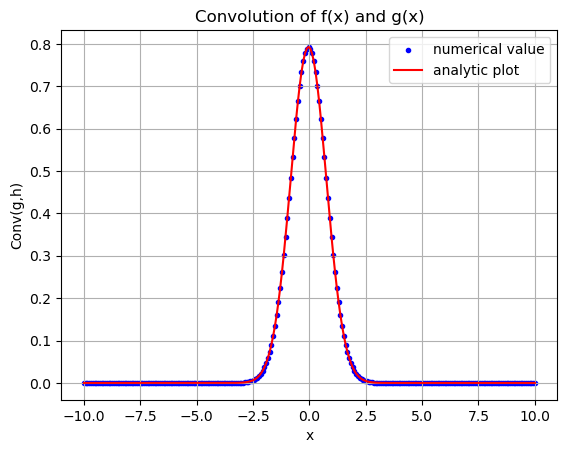

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def g(x):
    return np.exp(-x**2)
    

def h(x):
    return np.exp(-4*(x**2))

    

def analytic_plot(x):
    return np.sqrt(np.pi/5)*np.exp((-x**2)*(4/5))



x_min = -10
x_max = 10
n = 256
dx = (x_max-x_min)/(n-1)
x_arr=np.arange(x_min,x_max+dx,dx,float)

g=np.vectorize(g)
h=np.vectorize(h)

g_arr=g(x_arr)
h_arr=h(x_arr)



fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].scatter(x_arr, g_arr, c='red',label="sampled points",marker=".")
axes[0].plot(x_arr2, g(x_arr2), c='blue',label="curve")
axes[0].set_title('g(x)=e^(-x^2)')
axes[0].set_xlabel('x')
axes[0].grid()
axes[0].legend()


axes[1].scatter(x_arr, h_arr,c="purple",label="sampled points",marker=".")
axes[1].plot(x_arr2, h(x_arr2),c="green",label="curve")
axes[1].set_title('h(x)=e^(-4x^2)')
axes[1].set_xlabel('x')
axes[1].grid()
axes[1].legend()

plt.tight_layout()

plt.show()


padded_g=np.pad(g_arr, (0, len(g_arr)), mode='constant')
padded_h=np.pad(h_arr, (0, len(h_arr)), mode='constant')


dft_g=np.fft.fft(padded_g,norm="ortho")
dft_h=np.fft.fft(padded_h,norm="ortho")
 
gh_arr=np.multiply(dft_g,dft_h)

ift_arr=np.fft.ifft(gh_arr,norm="ortho") 
conv_arr=(dx*np.sqrt(2*n))*np.abs(ift_arr)

conv_arr=conv_arr[int(n/2):int(-n/2)]
plt.scatter(x_arr,conv_arr,color="blue",marker=".",label="numerical value")
plt.grid()
plt.plot(x_arr,conv_arr,color ="red",label="analytic plot")
plt.legend()
plt.title("Convolution of f(x) and g(x)")
plt.ylabel("Conv(g,h)")
plt.xlabel("x")
plt.show()